# Python Data Analysis

==========

# Full Data Analysis Case-study (Sales Data Analysis)

### 1] Libraries & Data Importing

##### Import libraries and read in the Sales Data csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg

In [2]:
df=pd.read_csv("Sales Data.csv")

In [3]:
df.head()

Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New York City     7  
2    11.95   New York City    18  
3   149.99   San Francisco    15  
4    11.95         Atlanta    12

### 2] Data Understanding (Asking Questions)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
df["Unnamed: 0"].value_counts()

0        12
6412     12
6396     12
6397     12
6398     12
         ..
21988     1
21987     1
21986     1
21985     1
20318     1
Name: Unnamed: 0, Length: 25093, dtype: int64

In [6]:
# dtypes are ok , but i will replace Unnamed: 0  with
df["order details"]=df["Unnamed: 0"]

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

##### Check the content of the DataFrame

In [8]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'order details'],
      dtype='object')

##### How many rows and columns are there?

In [9]:
df.shape

(185950, 11)

### 3] Data Wrangling (Cleaning & Manipulation)

In [10]:
df.sample()

Order ID                 Product  Quantity Ordered  Price Each  \
180082    217285  27in 4K Gaming Monitor                 1      389.99   

                 Order Date                           Purchase Address  Month  \
180082  2019-06-06 20:22:00  72 Washington St, San Francisco, CA 94016      6   

         Sales            City  Hour  order details  
180082  389.99   San Francisco    20           7728

##### Are there any missing / duplicated data?

In [11]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
order details       0
dtype: int64

In [12]:
df.duplicated().sum()

0

<AxesSubplot:>

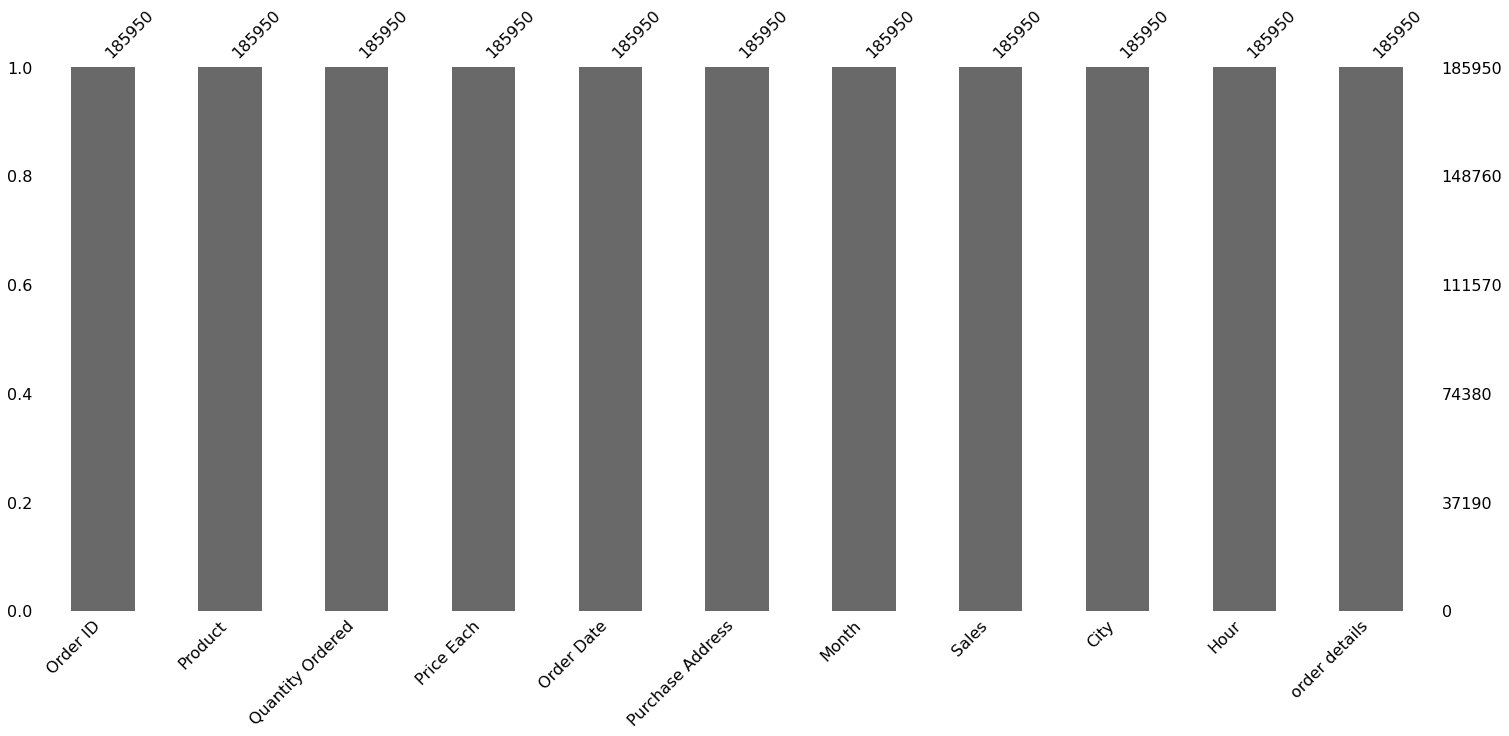

In [13]:
msg.bar(df)

## EDA

In [14]:
categoical_features=df.select_dtypes(include="object").columns

In [15]:
categoical_features

Index(['Product', 'Order Date', 'Purchase Address', 'City'], dtype='object')

In [16]:
numerical_features=df.select_dtypes(include="number").columns

In [17]:
numerical_features

Index(['Order ID', 'Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour',
       'order details'],
      dtype='object')

## univainte catgorical

In [18]:
df.describe(include="object")

Product           Order Date  \
count                 185950               185950   
unique                    19               142395   
top     USB-C Charging Cable  2019-12-15 20:16:00   
freq                   21903                    8   

                              Purchase Address            City  
count                                   185950          185950  
unique                                  140787               9  
top     193 Forest St, San Francisco, CA 94016   San Francisco  
freq                                         9           44732

In [19]:
df["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

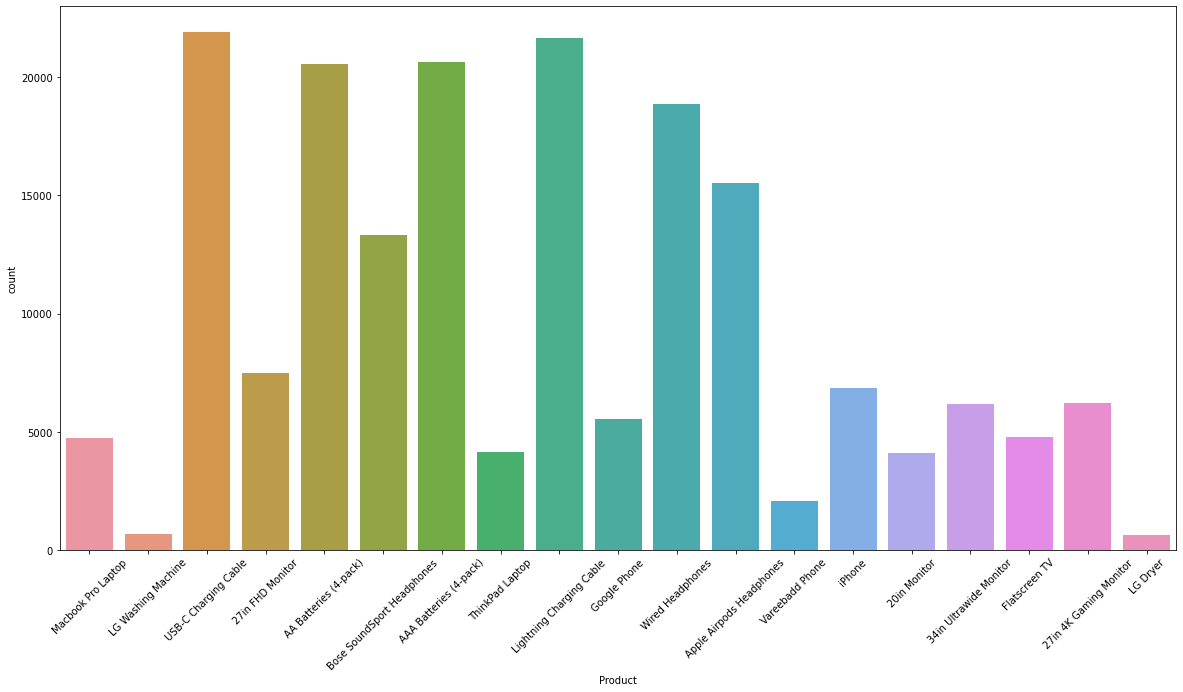

In [20]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="Product")
plt.show()

In [21]:
df["Order Date"].value_counts()

2019-12-15 20:16:00    8
2019-10-30 21:28:00    7
2019-04-02 13:24:00    7
2019-12-11 13:24:00    7
2019-10-11 19:44:00    6
                      ..
2019-08-06 08:32:00    1
2019-08-18 20:27:00    1
2019-08-30 16:29:00    1
2019-08-15 14:05:00    1
2019-06-25 14:33:00    1
Name: Order Date, Length: 142395, dtype: int64

In [22]:
df["Order Date"].str.split("-")[0]

['2019', '12', '30 00:01:00']

In [23]:
def get_year(value):
    return value.split("-")[0]
df["year"]=df["Order Date"].apply(get_year)

In [24]:
df["year"].value_counts()

2019    185916
2020        34
Name: year, dtype: int64

In [25]:
df["Order Date"][0].split("-")[-1].split()[0]

'30'

In [26]:
def get_day(value):
    return value.split("-")[-1].split()[0]
df["day"]=df["Order Date"].apply(get_day)

In [27]:
df["day"].value_counts()

13    6306
10    6249
02    6197
19    6194
17    6177
26    6158
24    6150
20    6148
18    6146
14    6129
27    6117
16    6116
15    6114
09    6114
22    6110
28    6103
12    6093
21    6090
06    6088
08    6073
11    6068
04    6066
25    6064
01    6051
23    6049
07    6033
05    6020
03    5819
29    5720
30    5633
31    3555
Name: day, dtype: int64

In [28]:
df.drop("Order Date",axis=1,inplace=True)

In [29]:
df[["Purchase Address"]]

Purchase Address
0       136 Church St, New York City, NY 10001
1          562 2nd St, New York City, NY 10001
2         277 Main St, New York City, NY 10001
3          410 6th St, San Francisco, CA 94016
4                43 Hill St, Atlanta, GA 30301
...                                        ...
185945           795 Pine St, Boston, MA 02215
185946   495 North St, New York City, NY 10001
185947   319 Ridge St, San Francisco, CA 94016
185948    916 Main St, San Francisco, CA 94016
185949          209 11th St, Atlanta, GA 30301

[185950 rows x 1 columns]

In [30]:
df["Purchase Address"].value_counts()

193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
716 5th St, San Francisco, CA 94016       7
550 Cherry St, San Francisco, CA 94016    7
                                         ..
339 Forest St, San Francisco, CA 94016    1
344 2nd St, Austin, TX 73301              1
75 Lincoln St, San Francisco, CA 94016    1
675 Cherry St, Atlanta, GA 30301          1
209 11th St, Atlanta, GA 30301            1
Name: Purchase Address, Length: 140787, dtype: int64

In [31]:
df["Purchase Address"][0].split(",")[0]

'136 Church St'

In [32]:
def get_street(value):
    return value.split(",")[0]
df["street"]=df["Purchase Address"].apply(get_street)

In [33]:
def get_country(value):
    return value.split(",")[2]
df["country"]=df["Purchase Address"].apply(get_country)

In [34]:
df.drop("Purchase Address",axis=1,inplace=True)

In [35]:
df.sample()

Order ID                 Product  Quantity Ordered  Price Each  Month  \
75855    241908  27in 4K Gaming Monitor                 1      389.99      8   

        Sales            City  Hour  order details  year day           street  \
75855  389.99   San Francisco     4           5458  2019  14  666 Chestnut St   

         country  
75855   CA 94016

In [36]:
df.describe(include="object")

Product            City    year     day      street  \
count                 185950          185950  185950  185950      185950   
unique                    19               9       2      31       46837   
top     USB-C Charging Cable   San Francisco    2019      13  986 7th St   
freq                   21903           44732  185916    6306          14   

          country  
count      185950  
unique         10  
top      CA 94016  
freq        44732

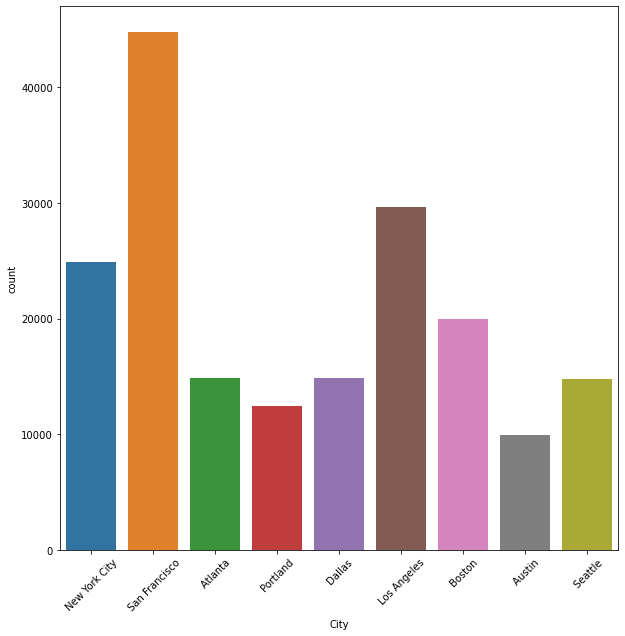

In [37]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="City")
plt.show()

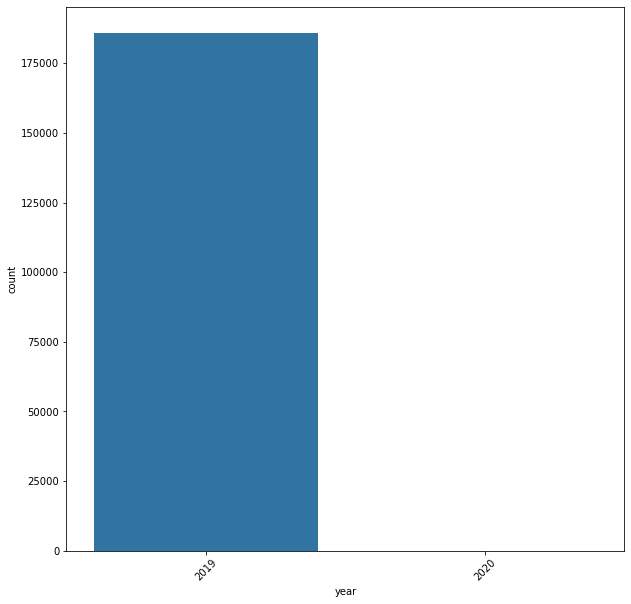

In [38]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="year")
plt.show()

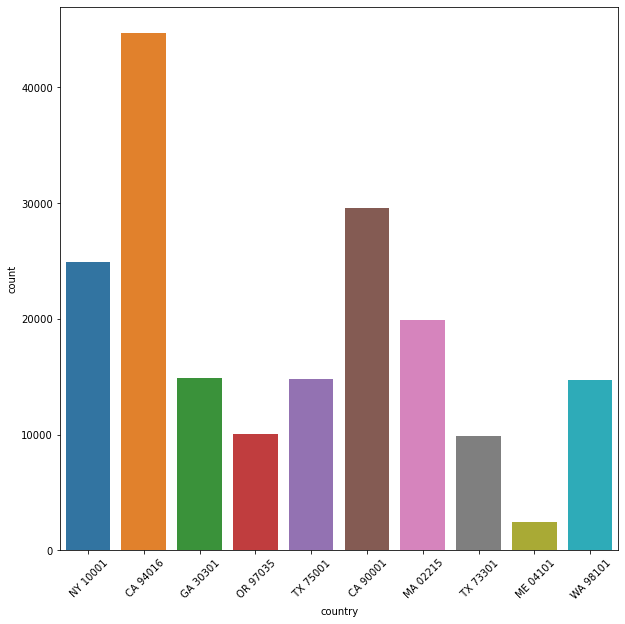

In [39]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="country")
plt.show()

In [40]:
df["Hour"]=df["Hour"].astype("O")

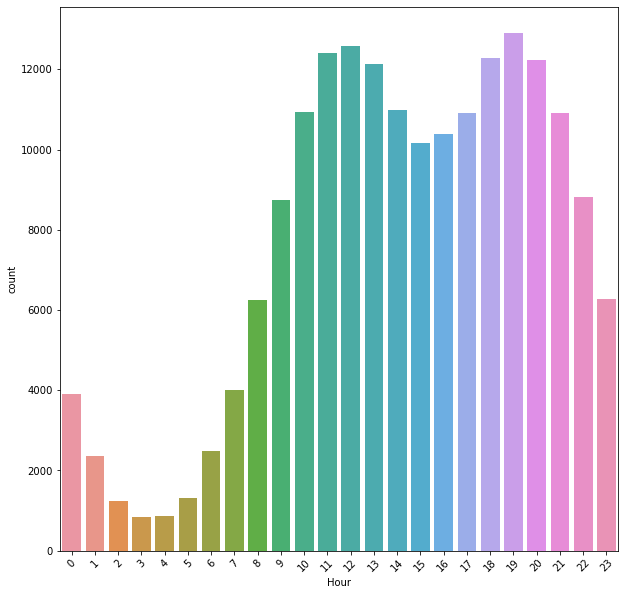

In [41]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="Hour")
plt.show()

In [42]:
df["Month"]=df["Month"].astype("O")

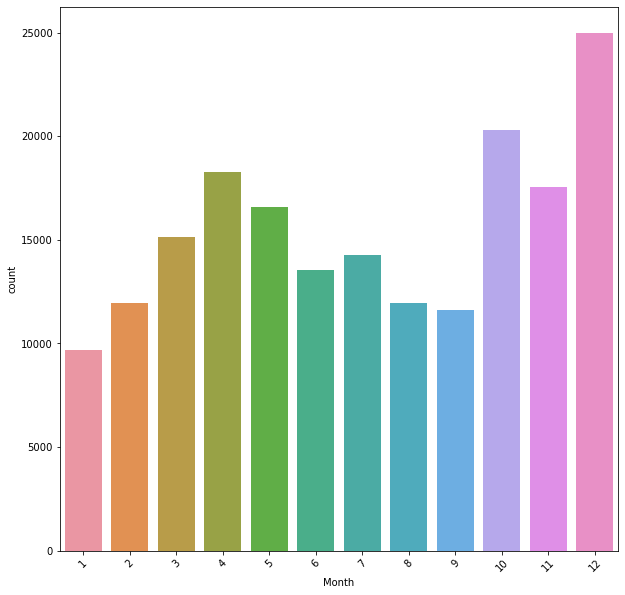

In [43]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data=df,x="Month")
plt.show()

## unvarinte numerical 

In [44]:
df.describe()

Order ID  Quantity Ordered     Price Each          Sales  \
count  185950.000000     185950.000000  185950.000000  185950.000000   
mean   230417.569379          1.124383     184.399735     185.490917   
std     51512.737110          0.442793     332.731330     332.919771   
min    141234.000000          1.000000       2.990000       2.990000   
25%    185831.250000          1.000000      11.950000      11.950000   
50%    230367.500000          1.000000      14.950000      14.950000   
75%    275035.750000          1.000000     150.000000     150.000000   
max    319670.000000          9.000000    1700.000000    3400.000000   

       order details  
count  185950.000000  
mean     8340.388475  
std      5450.554093  
min         0.000000  
25%      3894.000000  
50%      7786.000000  
75%     11872.000000  
max     25116.000000

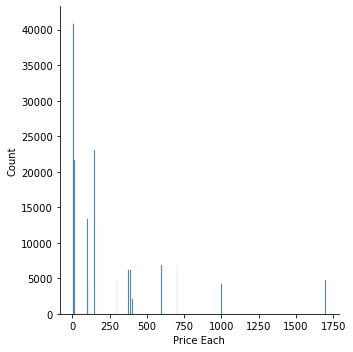

In [45]:
sns.displot(data=df,x="Price Each")
plt.show()

<AxesSubplot:ylabel='Frequency'>

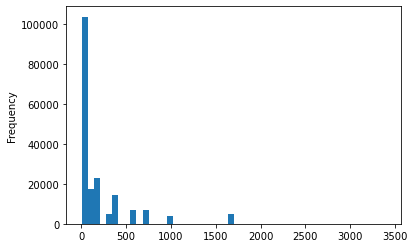

In [46]:
df["Sales"].plot(kind="hist",bins=50)

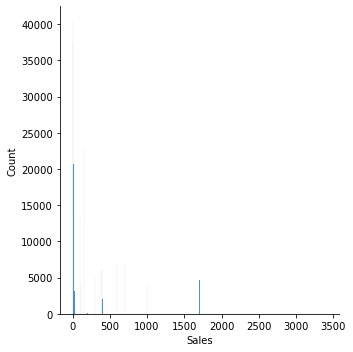

In [47]:
sns.displot(data=df,x="Sales")
plt.show()

# bi_varinte 

In [48]:
df.head()

Order ID               Product  Quantity Ordered  Price Each Month  \
0    295665    Macbook Pro Laptop                 1     1700.00    12   
1    295666    LG Washing Machine                 1      600.00    12   
2    295667  USB-C Charging Cable                 1       11.95    12   
3    295668      27in FHD Monitor                 1      149.99    12   
4    295669  USB-C Charging Cable                 1       11.95    12   

     Sales            City Hour  order details  year day         street  \
0  1700.00   New York City    0              0  2019  30  136 Church St   
1   600.00   New York City    7              1  2019  29     562 2nd St   
2    11.95   New York City   18              2  2019  12    277 Main St   
3   149.99   San Francisco   15              3  2019  22     410 6th St   
4    11.95         Atlanta   12              4  2019  18     43 Hill St   

     country  
0   NY 10001  
1   NY 10001  
2   NY 10001  
3   CA 94016  
4   GA 30301

In [49]:
# count of orders per order details
df.groupby("Order ID")[["order details"]].agg(len).sort_values(by="order details",ascending=False).head(10)

order details
Order ID               
160873                5
312462                4
242936                4
235798                4
165665                4
304802                4
196615                4
263918                4
226625                4
277875                4

In [50]:
# count of products per each order 
df.groupby("Order ID")[["Product"]].agg(len).sort_values(by="Product",ascending=False).head(10)

Product
Order ID         
160873          5
312462          4
242936          4
235798          4
165665          4
304802          4
196615          4
263918          4
226625          4
277875          4

In [51]:
# feature engering
df["total price"]=df["Quantity Ordered"]*df["Price Each"]

In [52]:
# total price of per each order 
df.groupby("Order ID")[["total price"]].agg(sum)

total price
Order ID             
141234         700.00
141235          14.95
141236          23.98
141237         149.99
141238          11.99
...               ...
319666          14.95
319667           7.68
319668         400.00
319669          11.99
319670          99.99

[178437 rows x 1 columns]

In [53]:
# average of total price
df["total price"].mean()

185.490916751815

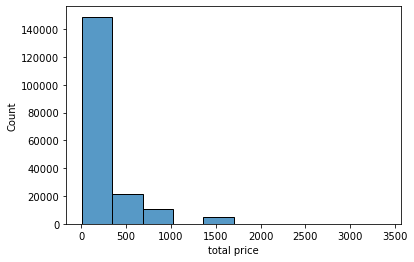

In [54]:
sns.histplot(data=df,x="total price",bins=10);

In [55]:
df[df["total price"]>1700].shape 

(6, 14)

In [56]:
# >1700 is outlier
df.drop(df[df["total price"]>1700].index,inplace=True)

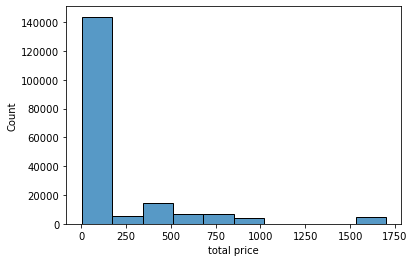

In [57]:
sns.histplot(data=df,x="total price",bins=10);

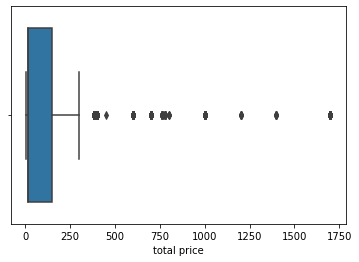

In [58]:
sns.boxplot(data=df,x="total price");

In [59]:
df.head()

Order ID               Product  Quantity Ordered  Price Each Month  \
0    295665    Macbook Pro Laptop                 1     1700.00    12   
1    295666    LG Washing Machine                 1      600.00    12   
2    295667  USB-C Charging Cable                 1       11.95    12   
3    295668      27in FHD Monitor                 1      149.99    12   
4    295669  USB-C Charging Cable                 1       11.95    12   

     Sales            City Hour  order details  year day         street  \
0  1700.00   New York City    0              0  2019  30  136 Church St   
1   600.00   New York City    7              1  2019  29     562 2nd St   
2    11.95   New York City   18              2  2019  12    277 Main St   
3   149.99   San Francisco   15              3  2019  22     410 6th St   
4    11.95         Atlanta   12              4  2019  18     43 Hill St   

     country  total price  
0   NY 10001      1700.00  
1   NY 10001       600.00  
2   NY 10001        11.95  
3   CA 94016       149.99  
4   GA 30301        11.95

In [60]:
# top 5 city has maked ordered 
df.groupby("City")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()

total price
City                       
 San Francisco   8255403.91
 Los Angeles     5452570.80
 New York City   4658917.45
 Boston          3656242.03
 Atlanta         2795498.58

In [61]:
df["Product"].value_counts().head()

USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

In [62]:
# top 5 product has maked ordered 
df.groupby("Product")[["Order ID"]].agg(len).sort_values(by="Order ID",ascending=False).head()

Order ID
Product                           
USB-C Charging Cable         21903
Lightning Charging Cable     21658
AAA Batteries (4-pack)       20641
AA Batteries (4-pack)        20577
Wired Headphones             18882

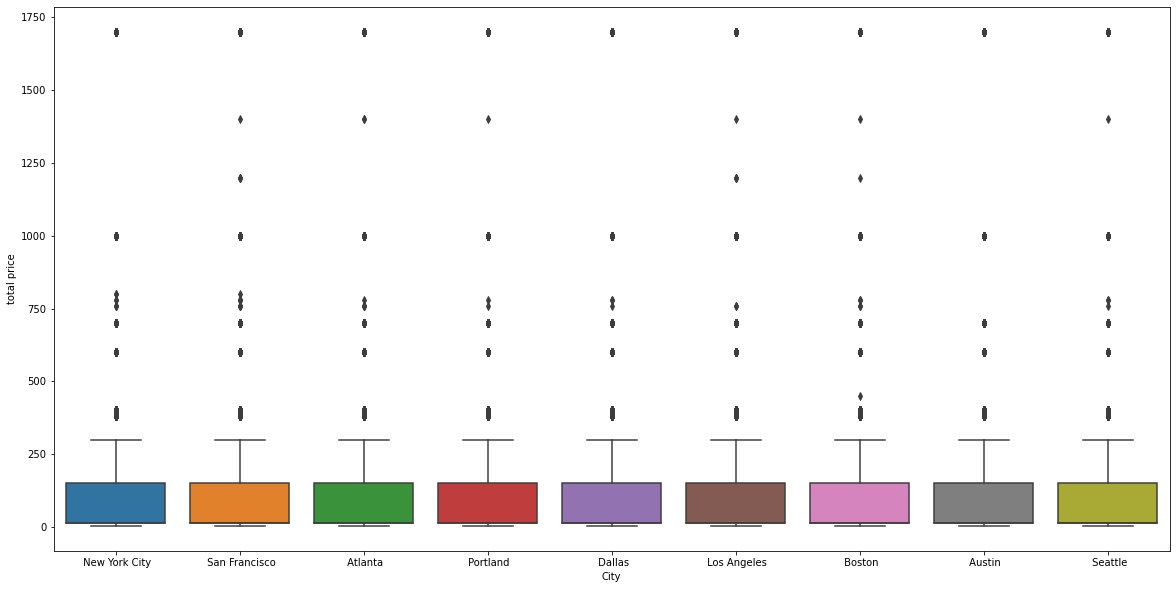

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="City",y="total price");

In [64]:
# top 5 street has maked ordered 
df.groupby("street")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()

total price
street                  
844 12th St      6513.93
874 4th St       6506.87
480 Hill St      6289.75
986 7th St       5975.82
354 Main St      5829.89

In [65]:
# top 5 country has maked ordered 
df.groupby("country")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()

total price
country               
 CA 94016   8255403.91
 CA 90001   5452570.80
 NY 10001   4658917.45
 MA 02215   3656242.03
 GA 30301   2795498.58

In [66]:
# top 5 year has maked ordered 
df.groupby("year")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()


total price
year             
2019  34465765.72
2020      8670.29

In [67]:
# top 5 month has maked ordered 
df.groupby("Month")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()


total price
Month             
12      4613443.34
10      3734726.90
4       3383870.24
11      3199603.20
5       3149206.75

In [68]:
# top 5 year has maked ordered 
df.groupby("day")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()


total price
day             
09    1169250.43
10    1169108.73
25    1168818.59
11    1167958.49
01    1166319.25

In [69]:
def handle_hour(value):
    if value >=0 and value <=12:
        return "AM"
    else:
        return "PM"
df["AM_PM"]=df["Hour"].apply(handle_hour)

In [70]:
df["AM_PM"].value_counts()

PM    117998
AM     67946
Name: AM_PM, dtype: int64

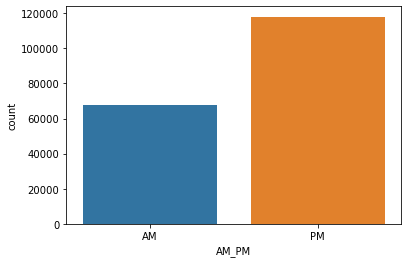

In [71]:
sns.countplot(data=df,x="AM_PM");

In [72]:
# which time is getting more money  
df.groupby("AM_PM")[["total price"]].agg(sum).sort_values(by="total price",ascending=False).head()

total price
AM_PM             
PM     21946632.68
AM     12527803.33

In [73]:
df.sample()

Order ID                   Product  Quantity Ordered  Price Each  \
176791    214119  Lightning Charging Cable                 1       14.95   

       Month  Sales      City Hour  order details  year day          street  \
176791     6  14.95   Seattle   21           4423  2019  02  799 Hickory St   

          country  total price AM_PM  
176791   WA 98101        14.95    PM

In [74]:
# which cities is getting more sales  
df.groupby("City")[["Sales"]].agg(sum).sort_values(by="Sales",ascending=False).head()

Sales
City                      
 San Francisco  8255403.91
 Los Angeles    5452570.80
 New York City  4658917.45
 Boston         3656242.03
 Atlanta        2795498.58

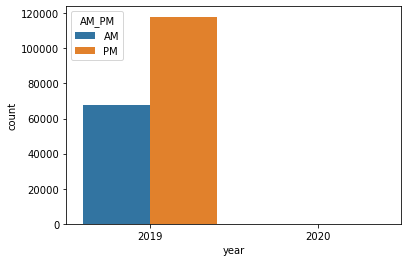

In [75]:
sns.countplot(data=df ,x="year",hue="AM_PM");

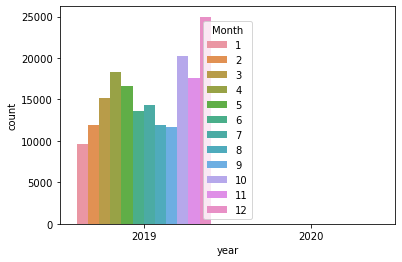

In [76]:
sns.countplot(data=df ,x="year",hue="Month");

In [77]:
numerical_features

Index(['Order ID', 'Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour',
       'order details'],
      dtype='object')

In [78]:
#total price has the meaning of this two columns
df.drop(columns=['Quantity Ordered', 'Price Each'],axis=1,inplace=True)

In [79]:
df.columns

Index(['Order ID', 'Product', 'Month', 'Sales', 'City', 'Hour',
       'order details', 'year', 'day', 'street', 'country', 'total price',
       'AM_PM'],
      dtype='object')

In [80]:
plot_features=[ 'Month', 'Sales', 'Hour','year', 'day','total price']

c:\Users\Hossam\anaconda3\lib\site-packages\seaborn\distributions.py:454: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
c:\Users\Hossam\anaconda3\lib\site-packages\seaborn\distributions.py:455: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(np.diff(edges) * shrink, name="widths"),
c:\Users\Hossam\anaconda3\lib\site-packages\seaborn\distributions.py:454: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
c:\Users\Hossam\anaconda3\lib\site-packages\seaborn\distributions.py:455: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (ma

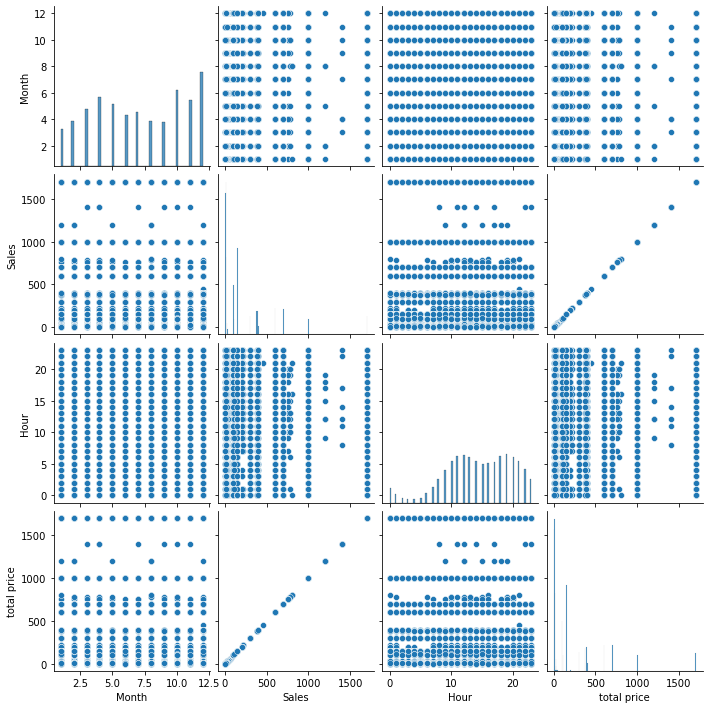

In [81]:
sns.pairplot(df[plot_features])

<ipython-input-82-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

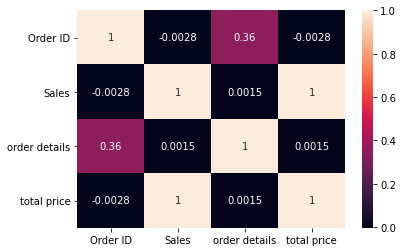

In [82]:
sns.heatmap(df.corr(),annot=True)

In [83]:
import plotly.express as px

In [84]:
px.pie(data_frame=df,names="AM_PM",values="total price")

In [85]:
df.to_csv("sales.csv")

# GOOD LUCK!